# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')#completa el código
usage = pd.read_csv('/datasets/usage.csv')#completa el código

In [3]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
print(users.isna().sum())
print(users.isna().mean())

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [11]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?
- En users churn_date y en usage son 3: date, duration, lenght
- Indica qué harías: ¿imputar, eliminar, ignorar?
- churn_date lo elimino o ignoro.
- en date puedo dejarlo como nulo porque es una fecha.
- duration si se necesita investigacion de los datos para imputar o bien, dejarlos como nulos.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
# explorar columnas numéricas de users
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` no sabría como innterpretar la columna de usuarios pero la media y la mediana o percentil 50% es el mismo valor.
- La columna `age` aquí tambien podemos ver que la media y la mediana son muy similares, la desviacion estandar tiene valor bajo comparado con user_id entonces podemos inferir por estos indicadores que los valores no están tan dispersos. 

In [13]:
# explorar columnas numéricas de usage
usage[['id','user_id']].describe()

,id,user_id
count,40000.00000,40000.000000
mean,20000.50000,12002.405975
std,11547.14972,1157.279564
min,1.00000,10000.000000
25%,10000.75000,10996.000000
50%,20000.50000,12013.000000
75%,30000.25000,13005.000000
max,40000.00000,13999.000000


- Las columnas `id` y `user_id`tienen la misma desviacion estandar

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']

users[columnas_user].describe()

,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


- La columna `city` ahora tiene 7 valores únicos. La moda es Bogotá con 808 apariciones.
- La columna `plan` El plan más frecuente es Basico (2595 veces)

In [15]:
# explorar columna categórica de usage
usage['type'].describe()


count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type` tiene 40 mil registros con solo 2 categorias siendo 'text' la mas frecuente con 22092 entradas, esto representa mas del 50% del total


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?  

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [17]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date']) # completa el código

In [18]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
3995    2024
3996    2024
3997    2024
3998    2024
3999    2024
Name: reg_date, Length: 4000, dtype: int64

En `reg_date`, tenemos registros en un rango de año de 2022 a 2024

In [19]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year

0        2024.0
1        2024.0
2        2024.0
3        2024.0
4        2024.0
          ...  
39995    2024.0
39996    2024.0
39997    2024.0
39998    2024.0
39999    2024.0
Name: date, Length: 40000, dtype: float64

En `date`, encontramos que todas las fechas corresponden al año 2024 y se comprobó con "nunique()"

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?
- No aparecen fechas imposibles asi que podemos mantener los datos que hay

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [21]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?',pd.NA)

# Verificar cambios
users['city'].describe()


count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [22]:
# Marcar fechas futuras como NA para reg_date

users.loc[users['reg_date'].dt.year > 2024,'reg_date'] = pd.NaT

# Verificar cambios
users['reg_date'].isna().sum()

40

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [23]:
# Verificación MAR en usage (Missing At Random) para duration
usage['duration'].isna().groupby(usage['type']).mean()

type
call    0.000000
text    0.999276
Name: duration, dtype: float64

In [24]:
# Verificación MAR en usage (Missing At Random) para length
usage['length'].isna().groupby(usage['type']).mean()

type
call    0.99933
text    0.00000
Name: length, dtype: float64

Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length` claramente los nulos de duration se ecuentran concentrados en text y visceversa, seria ilogico que una llamada presentara valores de length cuando no la tiene asi que se quedan como nulos.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [25]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage[['user_id', 'is_text', 'is_call', 'duration']].groupby('user_id').sum().reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [26]:
# Renombrar columnas
usage_agg.columns = ['user_id', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [27]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = pd.merge(users, usage_agg, on='user_id', how='left')
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [28]:
# Resumen estadístico de las columnas numéricas
user_profile[['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.122250,5.524381,4.478120,23.317054
std,17.690408,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,47.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [29]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts(normalize=True) * 100

Basico     64.875
Premium    35.125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

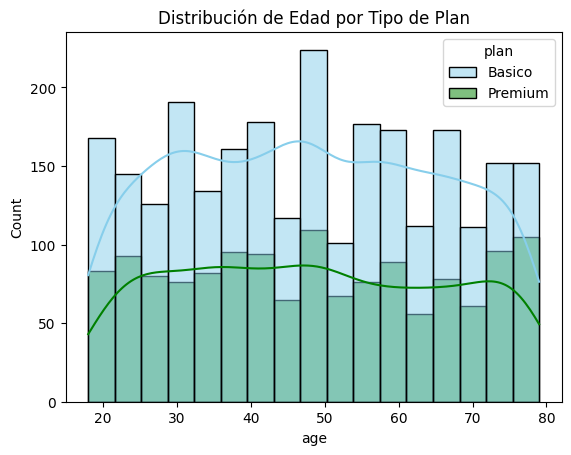

In [30]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x='age', hue='plan', palette=['skyblue', 'green'], kde=True)
plt.title('Distribución de Edad por Tipo de Plan')
plt.show()

💡Insights: 
- Distribución claramente hay mas usuarios con plan básico. Podemos observar en el histograma también que la relación de usuarios y edad son muy similares en ambos planes, cabe recalcar que aunque son similares, el plan premium presenta una distribución mas plana.

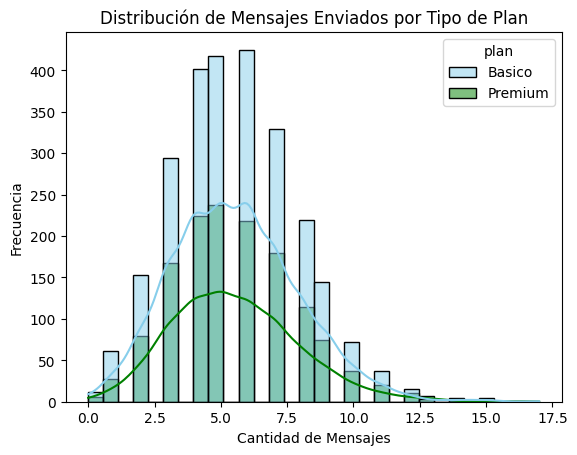

In [31]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', palette=['skyblue', 'green'], bins=30,kde=True)
plt.title('Distribución de Mensajes Enviados por Tipo de Plan')
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Se observa una distribución con sesgo a la derecha en ambos planes, concentrando el uso entre 3 y 8 mensajes mensuales. Existe una clara dominancia del plan Básico, con una frecuencia de uso aproximadamente el doble que el plan Premium, lo cual es consistente con la distribución general de la base de clientes.

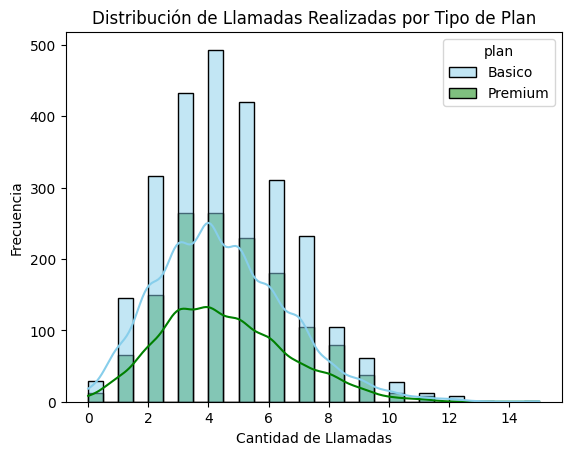

In [32]:
# Histograma para visualizar la cant_llamadas

sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', palette=['skyblue', 'green'], bins=30,kde=True)
plt.title('Distribución de Llamadas Realizadas por Tipo de Plan')
plt.xlabel('Cantidad de Llamadas')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
-La distribución de llamadas muestra un comportamiento consistente con la de mensajes: un marcado sesgo a la derecha con un pico de uso en 4 llamadas mensuales. No se observan diferencias significativas en el hábito de consumo entre planes.

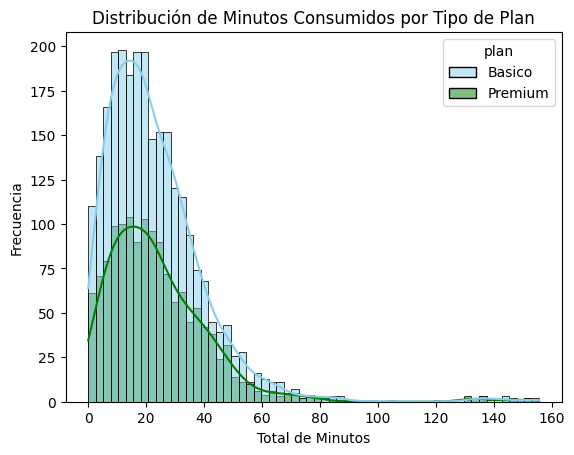

In [33]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', palette=['skyblue', 'green'], bins=60,kde=True)
plt.title('Distribución de Minutos Consumidos por Tipo de Plan')
plt.xlabel('Total de Minutos')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- El análisis detallado (60 bins) revela que el consumo modal se encuentra entre 10 y 20 minutos, desmitificando la idea de un uso nulo. Se confirma un sesgo positivo donde la gran mayoría de los clientes consume menos del 50% de los beneficios de su plan. Se identifican valores atípicos (outliers) que superan los 140 minutos, los cuales representan una oportunidad de migración a planes superiores o un foco de cargos adicionales por excedentes.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

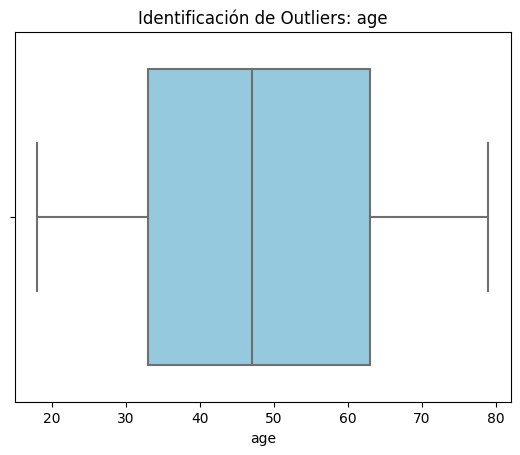

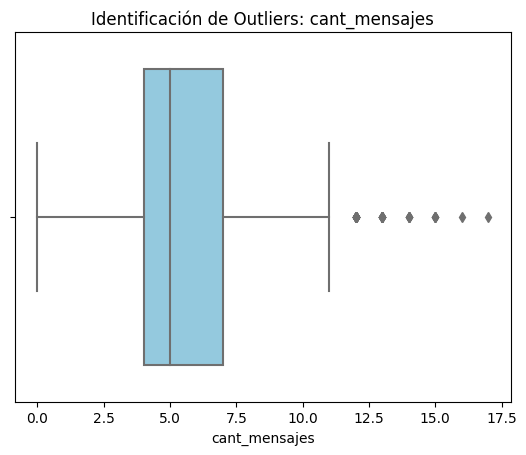

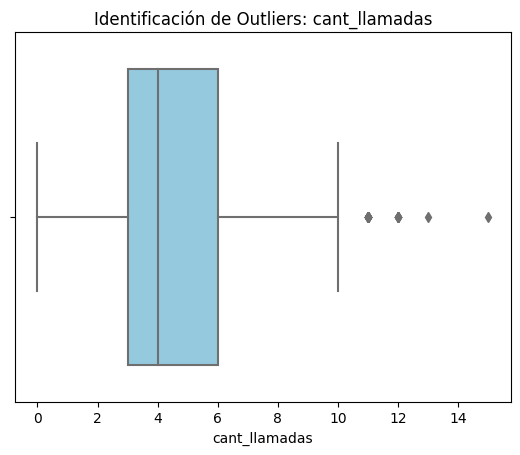

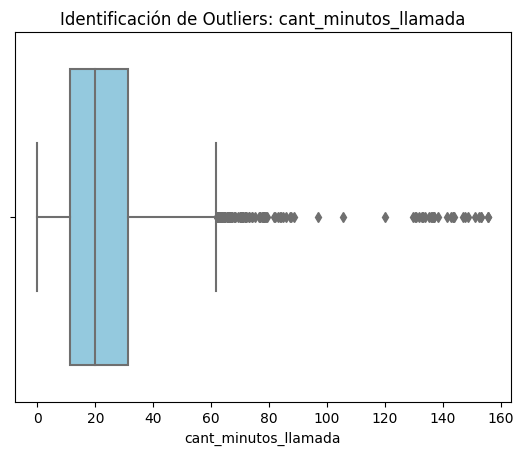

In [35]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    sns.boxplot(data=user_profile, x=col, color='skyblue')
    plt.title(f'Identificación de Outliers: {col}')
    plt.show()

💡Insights: 
- Age:La distribución es simétrica y balanceada. La mediana se encuentra centrada y los "bigotes" tienen una longitud similar, lo que indica que no hay un sesgo marcado hacia jóvenes o adultos mayores. Al no presentar outliers, los datos de edad son altamente confiables para realizar promedios y segmentaciones demográficas. 
- cant_mensajes: Presenta un claro sesgo a la derecha. La mayoría de los usuarios se concentran en el rango de 3 a 7 mensajes mensuales. Se observan outliers a partir de los 11 mensajes, llegando hasta cerca de 18. Esto indica que, aunque la mayoría usa poco los SMS, existe un pequeño grupo de usuarios con uso intenso. 
- cant_llamadas:Tiene un comportamiento muy similar a la mensajería, con un sesgo a la derecha. La mayoría de los clientes realiza entre 2 y 6 llamadas. Los outliers aparecen después de las 11 llamadas, lo que sugiere que el hábito de consumo de voz es moderado para casi toda la base de usuarios
- cant_minutos_llamada: Es la variable con el sesgo más pronunciado y la mayor cantidad de outliers. La caja es muy compacta en valores bajos, indicando que gran parte de los usuarios habla menos de 30-40 minutos totales. Sin embargo, los numerosos puntos que llegan hasta los 160 minutos representan un segmento de alto consumo que es vital para el negocio, ya que son quienes realmente aprovechan los límites de los planes.

In [55]:
# Calcular límites con el método IQR
columnas_limites = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)

    IQR = q3 - q1

    limite_superior = Q3 + 1.5 * IQR

    print("El límite superior de:", col)
    print(limite_superior)

    outliers = user_profile[user_profile[col] > limite_superior]
    print("Cantidad de outliers detectados:")
    print(len(outliers))

El límite superior de: age
93.4425
Cantidad de outliers detectados:
0
El límite superior de: cant_mensajes
37.4425
Cantidad de outliers detectados:
0
El límite superior de: cant_llamadas
36.4425
Cantidad de outliers detectados:
0
El límite superior de: cant_minutos_llamada
61.8575
Cantidad de outliers detectados:
109


In [40]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.122250,5.524381,4.478120,23.317054
std,17.690408,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,47.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


💡Insights: 
- en las ultimas tres columnas yo mantendría los outliers porque aunque puedan ser valores muy extremos nos está dando pistas de usuarios con otro tipo de consumo. Lo que se puede traducir quizá en crear un nuevo plan telefónico para ellos, esto a manera de estrategia de ventas. 

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [56]:
# Crear columna grupo_uso
def segmentar_uso(fila):
    # Aquí 'fila' es el renglón que Pandas está leyendo en ese microsegundo
    llamadas = fila['cant_llamadas'] 
    mensajes = fila['cant_mensajes']
    
    if llamadas < 5 and mensajes < 5:
        return 'Bajo uso'
    elif llamadas < 10 and mensajes < 10:
        return 'Uso medio'
    else:
        return 'Alto uso'

# Y aquí es donde sucede la magia:
user_profile['grupo_uso'] = user_profile.apply(segmentar_uso, axis=1)

In [57]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [58]:
# Crear columna grupo_edad
def segmentar_edad(fila):
    # Aquí 'fila' es el renglón que Pandas está leyendo en ese microsegundo
    edad = fila['age'] 
    
    if edad < 30:
        return 'Joven'
    elif edad < 60:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

# Y aquí es donde sucede la magia:
user_profile['grupo_edad'] = user_profile.apply(segmentar_edad, axis=1)

In [59]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

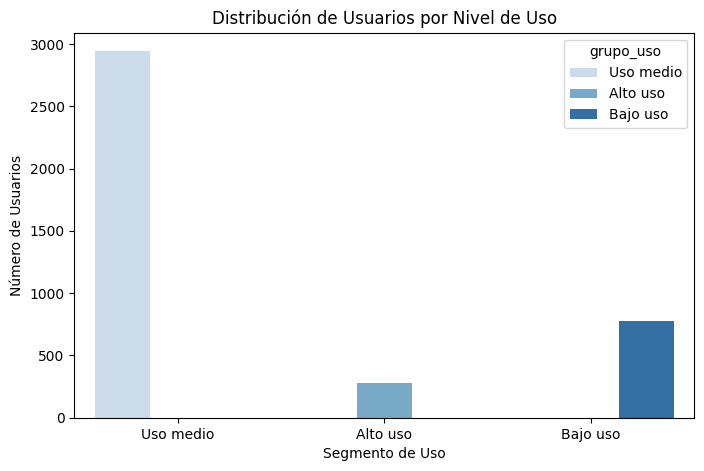

In [62]:
# Visualización de los segmentos por uso
plt.figure(figsize=(8, 5))
sns.countplot(data=user_profile, x='grupo_uso', hue='grupo_uso', palette='Blues')

plt.title('Distribución de Usuarios por Nivel de Uso')
plt.xlabel('Segmento de Uso')
plt.ylabel('Número de Usuarios')
plt.show()

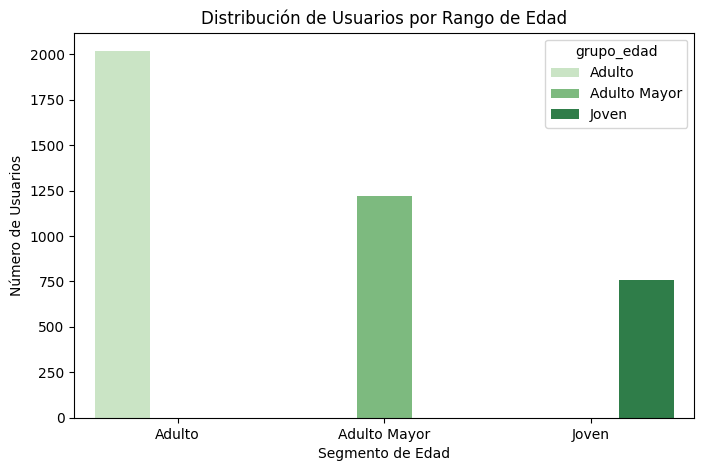

In [63]:
# Visualización de los segmentos por edad
plt.figure(figsize=(8, 5))
sns.countplot(data=user_profile, x='grupo_edad', hue='grupo_edad', palette='Greens')


plt.title('Distribución de Usuarios por Rango de Edad')
plt.xlabel('Segmento de Edad')
plt.ylabel('Número de Usuarios')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Presencia de Outliers: Se detectaron valores atípicos en las columnas de llamadas, mensajes y minutos que representan entre el 2% y 3% del total de los datos.

- Sesgo Positivo (Derecha): La distribución de los datos no es simétrica; la gran mayoría de los usuarios se concentra en consumos bajos, mientras que unos pocos "Power Users" disparan los promedios hacia arriba.

🔍 **Segmentos por Edad**
- Predominio Adulto: Es el segmento más fuerte de la compañía con casi 2,000 usuarios, lo que representa el motor principal de ingresos para ConnectaTel.

- Baja penetración en Jóvenes: Este grupo es el más pequeño (aproximadamente la mitad que el de adultos), lo que sugiere que la oferta actual no está conectando con el público menor de 30 años. Los Adultos Mayores se mantienen estables en un punto medio.


📊 **Segmentos por Nivel de Uso**
- Concentración en Uso Bajo/Medio: La inmensa mayoría de los clientes han sido etiquetados en estos rangos, lo que demuestra que los límites de los planes actuales están muy por encima del consumo real.

- Subutilización de Servicios: Especialmente en el área de mensajes de texto (SMS), el uso es marginal en prácticamente todos los segmentos.

➡️ Esto sugiere que a oferta comercial actual de ConnectaTel está "sobredimensionada". Estamos vendiendo planes con capacidades muy altas a una base de clientes (principalmente adultos) que busca comunicación estable pero no masiva. Existe una desconexión entre lo que el cliente paga y lo que realmente utiliza, lo que genera un riesgo de que busquen opciones más económicas en la competencia.


💡 **Recomendaciones**
- Rediseño de Planes: Crear un "Plan Esencial" con límites más bajos de minutos y SMS a un precio más competitivo para capturar al segmento de "Bajo uso".

- Estrategia de Retención Premium: Implementar beneficios adicionales (que no sean minutos) para los usuarios Premium que consumen poco, justificando así el costo de su suscripción.

- Plan "Data-First" para Jóvenes: Para atraer al segmento joven que hoy nos falta, se recomienda un plan que priorice gigas de navegación, reduciendo al mínimo los minutos y mensajes que este grupo ya casi no utiliza.

- Análisis Profundo de Consumo de Datos (MB): Se recomienda realizar un estudio específico sobre el uso de internet por rango de edad. Es vital confirmar si los jóvenes están migrando a la competencia buscando planes con navegación ilimitada.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`